# Coursework 1:
Problems are set by Dr. Wei Dai and Mr. Xi Yao, 2022

In [1]:
using DataFrames, FFTW, BenchmarkTools, LinearAlgebra, StatsBase, CairoMakie, LinearMaps, IterativeSolvers,JLD2

# Make sure that you complete the involvement table. 
# The first row is for CID number. 
# Other rows are for the involvement for each "big" problem (8 big problems in coursework 1). 
# "1" for getting involved in this part. 
# "0" for not involved
Contributions = DataFrame( A=[01700345,1,1,1,1,1,1,1,1], B = [01518690,1,1,1,1,1,1,1,1], C = [02243990, 1,1,1,1,1,1,1,1] )

Row,A,B,C
,Int64,Int64,Int64
1,1700345,1518690,2243990
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1
6,1,1,1
7,1,1,1
8,1,1,1
9,1,1,1


#   1 Trace (10)

Give a sqaure matrix $\boldsymbol{A} \in \mathbb{R}^{n \times n}$, its trace is defined as the sum of the diagonal elements:
\begin{align*}
    & \text{trace}(\boldsymbol{A}) := \sum_{i=1}^n A_{i,i}.
\end{align*}


##  1.1 (4)

Let $\boldsymbol{A},\boldsymbol{B} \in \mathbb{R}^{m \times n}$. 

    
1. Identify the dimension of $\boldsymbol{A} \boldsymbol{B}^{\mathsf{T}}$. 
        
        
2. Identify the dimension of $\boldsymbol{A}^{\mathsf{T}} \boldsymbol{B}$.  
        
3. Prove that 
       $$ 
        \begin{align*}
            & \text{trace}\left(\boldsymbol{A} \boldsymbol{B}^{\mathsf{T}}\right) 
            = \text{trace}\left(\boldsymbol{A}^{\mathsf{T}} \boldsymbol{B}\right).
        \end{align*}
       $$

## 1.1 Answer 

$\bold{Lemma}$ $1$:

From the definition of matrix multiplication, the dimension of the product of two matrices $\boldsymbol{M} \in \reals^{m \times n}$ and $\boldsymbol{N} \in \reals^{n \times p}$ is $\boldsymbol{M} \boldsymbol{N} \in \reals^{m \times p}$ where the number of rows of $\boldsymbol{M}$ is the number of rows of the product and the number of columns of $\boldsymbol{N}$ is the number of columns of the product.

$\bold{1.1.1}$ 

If $\boldsymbol{B} \in \reals^{m \times n}$ then $\boldsymbol{B}^{\mathsf{T}} \in \reals^{n \times m}$ since the transpose of a matrix is the matrix with the rows and columns swapped.


$\boldsymbol{A} \in \reals^{m \times n}$ and $\boldsymbol{B}^\mathsf{T} \in \reals^{n \times m}$ so the product $\boldsymbol{A} \boldsymbol{B}^\mathsf{T} \in \reals^{n \times m}$ matrix as per Lemma 1.


$\bold{1.1.2}$

If $\boldsymbol{A} \in \reals^{m \times n}$ then $\boldsymbol{A}^\mathsf{T} \in \reals^{n \times m}$ since the transpose of a matrix is the matrix with the rows and columns swapped.

$\boldsymbol{A}^\mathsf{T} \in \reals^{n \times m}$ and $\boldsymbol{B} \in \reals^{m \times n}$ so the product $\boldsymbol{A}^{\mathsf{T}} \boldsymbol{B} \in \reals^{n \times n}$ using Lemma 1.


$\bold{1.1.3}$

We use a fairly well known theorem which states that $\left(\boldsymbol{AB} \right)^{\mathsf{T}} = \boldsymbol{B}^{\mathsf{T}} \boldsymbol{A}^{\mathsf{T}}$

And a theorem which states that $\text{trace}(\boldsymbol{AB}) = \text{trace}(\boldsymbol{BA})$

As well as the fact that $\text{trace}(\boldsymbol{A}) = \text{trace}(\boldsymbol{A^{\mathsf{T}}})$

First we take the transpose of the product inside the trace on the left hand side:

$$ 
        \begin{align*}
            & \text{trace}\left(\boldsymbol{A} \boldsymbol{B}^{\mathsf{T}}\right) 
            = \text{trace}\left(\boldsymbol{B}^{\mathsf{T}} \boldsymbol{A}\right).
        \end{align*}
$$

We can do this because of the first and third statements above.

And now we switch the order of multiplication because of the second statement above:

$$ 
        \begin{align*}
            & \text{trace}\left(\boldsymbol{A} \boldsymbol{B}^{\mathsf{T}}\right) 
            = \text{trace}\left(\boldsymbol{A} \boldsymbol{B}^{\mathsf{T}}\right).
        \end{align*}
$$

And we are done.

##  1.2 (6)

For any two matrices $\boldsymbol{A},\boldsymbol{B} \in \mathbb{R}^{m \times n}$, define the inner product between them:
    $$
    \begin{align*}
        & \left\langle \boldsymbol{A},\boldsymbol{B} \right\rangle 
        := \text{trace}\left( \boldsymbol{A}^{\mathsf{T}} \boldsymbol{B} \right).
    \end{align*}
    $$

Let $\boldsymbol{A} \in \mathbb{R}^{m_1 \times n_1}$ and $\boldsymbol{B} \in \mathbb{R}^{m_2 \times n_2}$. 


1. Prove that 
        $$
        \begin{align*}
            & \left\langle \boldsymbol{A},\boldsymbol{B} \right\rangle
            = \left\langle \text{vect}(\boldsymbol{A}),\text{vect}(\boldsymbol{B}) \right\rangle
        \end{align*}
        $$
2. Specify the dimensions of $\boldsymbol{U}$ and $\boldsymbol{V}$ such that    
       $$
        \begin{align*}
            \left\langle \boldsymbol{U} \boldsymbol{A} \boldsymbol{V}^{\mathsf{T}},\boldsymbol{B} \right\rangle
        \end{align*}
        $$
        is well-defined. 
3.  Prove that 
        $$
        \begin{align*}
            & \left\langle \boldsymbol{U} \boldsymbol{A} \boldsymbol{V}^{\mathsf{T}},\boldsymbol{B} \right\rangle 
            = \left\langle  \boldsymbol{A},\boldsymbol{U}^{\mathsf{T}} \boldsymbol{B} \boldsymbol{V} \right\rangle.
        \end{align*}
        $$
        
        
        
        


        
## 1.2 Answer

$\bold{1.2.1}$ 

In order for the trace of $\boldsymbol{A}^{\mathsf{T}} \boldsymbol{B}$ to be well defined, $\boldsymbol{A}^{\mathsf{T}} \boldsymbol{B}$ must be a square matrix. Hence, $\boldsymbol{A} \in \reals^{m \times n}$ and $\boldsymbol{B} \in \reals^{m \times n}$ which means that $m_1 = m_2 = m$ and $n_1 = n_2 = n$. 

$A = \begin{bmatrix}
a_{11} & a_{12} & a_{13} & .. & a_{1n}\\ 
a_{21} & a_{22} & a_{23} & .. & a_{2n}\\
a_{31} & a_{32} & a_{33} & .. & a_{3n}\\
.. & .. & .. & .. & ..\\ 
a_{m1} & a_{m2} & a_{m3} & .. & a_{mn}
\end{bmatrix}$

$A^{\mathsf{T}} = \begin{bmatrix}
a_{11} & a_{21} & a_{31} & .. & a_{m1}\\ 
a_{12} & a_{22} & a_{32} & .. & a_{m2}\\
a_{13} & a_{23} & a_{33} & .. & a_{m3}\\
.. & .. & .. & .. & ..\\ 
a_{1n} & a_{2n} & a_{3n} & .. & a_{mn}
\end{bmatrix}$

$B = \begin{bmatrix}
b_{11} & b_{12} & b_{13} & .. & b_{1n}\\ 
b_{21} & b_{22} & b_{23} & .. & b_{2n}\\
b_{31} & b_{32} & b_{33} & .. & b_{3n}\\
.. & .. & .. & .. & ..\\ 
b_{m1} & b_{m2} & b_{m3} & .. & b_{mn}
\end{bmatrix}$

From the definition of matrix multiplication we know that $c_{ij} = \sum_{k=1}^{m}a'_{ik}b_{kj}$ where m is the number of columns in the first matrix and is the number of rows in the second matrix, and $c_{ij}$ is the element in the ith row and jth column of the product matrix.

$a'_{ik}$ is the element in the ith row and kth column of $\boldsymbol{A}^{\mathsf{T}}$ which means $a'_{ik} = a_{ki}$ where $a_{ki}$ is the element in the kth row and ith column of $\boldsymbol{A}$.

For the trace of a matrix we only need to sum these c values along the diagonal of the matrix, where i = j.

hence $\text{trace}\left( \boldsymbol{A}^{\mathsf{T}} \boldsymbol{B} \right) = \sum_{i=1}^{n}\sum_{k=1}^{m}a_{ki}b_{ki}$

We have shown that A and B must have the same dimensions in order for the trace of the product $\boldsymbol{A}^{\mathsf{T}}\boldsymbol{B}$ to be valid. This means that when we take the vectorized versions of these matrices and take their dot product, the elements of the same index will be multiplied together and summed.

Which can be written as $\sum_{i=1}^{n}\sum_{k=1}^{m}a_{ki}b_{ki}$, which is the same as the trace of the product of the matrices.

$\bold{1.2.2}$

In order for the inner product to be well defined $\boldsymbol{B}^{\mathsf{T}}\boldsymbol{U}\boldsymbol{A}\boldsymbol{V}^{\mathsf{T}}$ has to be a square matrix. $\boldsymbol{B}^{\mathsf{T}} \in \reals^{n_2 \times m_2}$ and $\boldsymbol{A} \in \reals^{m_1 \times n_1}$.

 $\boldsymbol{U} \in \reals^{m_2 \times m_1}$ is needed for the product to be defined and  $\boldsymbol{V}^{\mathsf{T}} \in \reals^{n_1 \times n_2}$ is needed for the product to be square (and to be multiplied by A).

All in all we need $\boldsymbol{U} \in \reals^{m_2 \times m_1}$ and $\boldsymbol{V} \in \reals^{n_2 \times n_1}$.

If $\left\langle \boldsymbol{A},\boldsymbol{B} \right\rangle$ also has to be defined then $m_2 = m_1$ and $n_2 = n_1$


$\bold{1.2.3}$

Using lemmas 2, 3 and 4 from the answer to 1.1

$\left\langle \boldsymbol{U} \boldsymbol{A} \boldsymbol{V}^{\mathsf{T}},\boldsymbol{B} \right\rangle = \boldsymbol{B}^{\mathsf{T}}\boldsymbol{U}\boldsymbol{A}\boldsymbol{V}^{\mathsf{T}}$

$= \boldsymbol{V}^{\mathsf{T}}\boldsymbol{B}^{\mathsf{T}} \boldsymbol{U} \boldsymbol{A}$

$= \boldsymbol{V}^{\mathsf{T}}\left(\boldsymbol{U}^{\mathsf{T}} \boldsymbol{B}\right)^{T} \boldsymbol{A}$

$= \left(\boldsymbol{U}^{\mathsf{T}}\boldsymbol{B} \boldsymbol{V}\right)^{T} \boldsymbol{A} = \left\langle  \boldsymbol{A},\boldsymbol{U}^{\mathsf{T}} \boldsymbol{B} \boldsymbol{V} \right\rangle$

#  2  Positive Semi-definite Matrices (15)

Let $\boldsymbol{A} \in \mathbb{R}^{n \times n}$ be symmetric, i.e., $\boldsymbol{A}^{\mathsf{T}}$. 

The matrix $\boldsymbol{A}$ is positive definite, denoted by $\boldsymbol{A} \succ 0$, if for all nonzero $\boldsymbol{v} \in \mathbb{R}^n$, it holds that 
\begin{align*}
    & \boldsymbol{v}^{\mathsf{T}} \boldsymbol{A} \boldsymbol{v} > 0. 
\end{align*}

It is positive semi-definite (also known as non-negative definite), denoted by $\boldsymbol{A} \succeq 0$, if for all nonzero $\boldsymbol{v} \in \mathbb{R}^n$, it holds that 
\begin{align*}
    & \boldsymbol{v}^{\mathsf{T}} \boldsymbol{A} \boldsymbol{v} \ge 0. 
\end{align*}

It is called indefinite if it is not positive semi-definite and not negative semi-definite. 

For each of the following matrices, identify whether it is positive definite, or positive semi-definite, or indefinite. For positive semi-definite matrices, identify a vector $\boldsymbol{v}$ such that $\boldsymbol{v}^{\mathsf{T}} \boldsymbol{A} \boldsymbol{v} = 0$. For indefinite matrices, identify two vectors $\boldsymbol{v}_1$ and $\boldsymbol{v}_2$ such that $\boldsymbol{v}_1^{\mathsf{T}} \boldsymbol{A} \boldsymbol{v}_1 > 0$ and $\boldsymbol{v}_2^{\mathsf{T}} \boldsymbol{A} \boldsymbol{v}_2 < 0$.




## 2.1 Diagonal matrices (5)

1.  $$
        \begin{align*}
            & \boldsymbol{A} = \begin{bmatrix}
                2 & \\ & 1
            \end{bmatrix}.
        \end{align*}
    $$
2. $$
        \begin{align*}
            & \boldsymbol{A} = \begin{bmatrix}
                0 & \\ & 1
            \end{bmatrix}.
        \end{align*}
    $$
3.  $$
        \begin{align*}
            & \boldsymbol{A} = \begin{bmatrix}
                2 & \\ & -1
            \end{bmatrix}.
        \end{align*}
    $$

#  2.1 Answer 


1 is positive definite.

2 is semi-definite.

  $$   
        \begin{align*}
            & \begin{bmatrix}
                0 & 1 
            \end{bmatrix}
            \begin{bmatrix}
                2 & 0 \\ 0 & 1
            \end{bmatrix}
            \begin{bmatrix}
                0 \\ 1
            \end{bmatrix}
             = 0
        \end{align*}
    $$
3 is indefinite.
$$   
        \begin{align*}
            & \begin{bmatrix}
                1 & 2 
            \end{bmatrix}
            \begin{bmatrix}
                2 & 0 \\ 0 & -1
            \end{bmatrix}
            \begin{bmatrix}
                1 \\ 2
            \end{bmatrix}
             < 0
        \end{align*}
    $$
    $$   
        \begin{align*}
            & \begin{bmatrix}
                2 & 1 
            \end{bmatrix}
            \begin{bmatrix}
                2 & 0 \\ 0 & -1
            \end{bmatrix}
            \begin{bmatrix}
                2 \\ 1
            \end{bmatrix}
             > 0
        \end{align*}
    $$

##  2.2 Matrices with explicit decomposition (5)

Let $$
    \begin{align*}
        & \boldsymbol{U} = \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            1 & 1 \\ 1 & -1
        \end{bmatrix}.
    \end{align*}
    $$

1.  $$   
        \begin{align*}
            & \boldsymbol{A} = 
            \boldsymbol{U} 
            \begin{bmatrix}
                2 & \\ & 1
            \end{bmatrix}
            \boldsymbol{U}^{\mathsf{T}}
        \end{align*}
    $$
2. $$   
        \begin{align*}
            & \boldsymbol{A} = 
            \boldsymbol{U} 
            \begin{bmatrix}
                0 & \\ & 1
            \end{bmatrix}
            \boldsymbol{U}^{\mathsf{T}}
        \end{align*}
    $$
3. $$   
        \begin{align*}
            & \boldsymbol{A} = 
            \boldsymbol{U} 
            \begin{bmatrix}
                2 & \\ & -1
            \end{bmatrix}
            \boldsymbol{U}^{\mathsf{T}}
        \end{align*}
    $$

##  2.2 Answer 


1 is positive definite.

2 is semi-definite.

  $$   
        \begin{align*}
            & \begin{bmatrix}
                -1 & -1 
            \end{bmatrix}
            \boldsymbol{U} 
            \begin{bmatrix}
                0 & 0 \\ 0 & 1
            \end{bmatrix}
            \boldsymbol{U}^{\mathsf{T}}
            \begin{bmatrix}
                -1 \\ -1
            \end{bmatrix}
             = 0
        \end{align*}
    $$
3 is indefinite.
$$   
        \begin{align*}
            & \begin{bmatrix}
                1 & -1 
            \end{bmatrix}
            \boldsymbol{U} 
            \begin{bmatrix}
                2 & 0 \\ 0 & -1
            \end{bmatrix}
            \boldsymbol{U}^{\mathsf{T}}
            \begin{bmatrix}
                1 \\ -1
            \end{bmatrix}
             < 0
        \end{align*}
    $$
    $$   
        \begin{align*}
            & \begin{bmatrix}
                1 & 1 
            \end{bmatrix}
            \boldsymbol{U} 
            \begin{bmatrix}
                2 & 0 \\ 0 -1
            \end{bmatrix}
            \boldsymbol{U}^{\mathsf{T}}
            \begin{bmatrix}
                1 \\ 1
            \end{bmatrix}
             > 0
        \end{align*}
    $$

##  2.3 General matrices (5)


1.  $$   
        \begin{align*}
            & \boldsymbol{A} =
            \begin{bmatrix}
                2 & 2 \\ 2 & 1
            \end{bmatrix}
        \end{align*}
    $$
2. $$   
        \begin{align*}
            & \boldsymbol{A} =
            \begin{bmatrix}
                2 & 2 \\ 2 & 2
            \end{bmatrix}
        \end{align*}
    $$
3. $$   
        \begin{align*}
            & \boldsymbol{A} =
            \begin{bmatrix}
                2 & 1 \\ 1 & 1
            \end{bmatrix}
        \end{align*}
    $$
4. $$   
        \begin{align*}
            & \boldsymbol{A} =
            \begin{bmatrix}
                2 & -1 \\ -1 & 1
            \end{bmatrix}
        \end{align*}
    $$

##  2.3 Answer 

1 is indefinite.

$$   
        \begin{align*}
            & \begin{bmatrix}
                1 & 1 
            \end{bmatrix}
            \begin{bmatrix}
                2 & 2 \\ 2 & 1
            \end{bmatrix}
            \begin{bmatrix}
                1 \\ 1
            \end{bmatrix}
             > 0
        \end{align*}
    $$
    $$   
        \begin{align*}
            & \begin{bmatrix}
                1 & -1 
            \end{bmatrix}
            \begin{bmatrix}
                2 & 2 \\ 2 & 1
            \end{bmatrix}
            \begin{bmatrix}
                1 \\ -1
            \end{bmatrix}
             < 0
        \end{align*}
    $$
    
2 is semi-definite.
$$   
        \begin{align*}
            & \begin{bmatrix}
                1 & -1 
            \end{bmatrix}
            \begin{bmatrix}
                2 & 2 \\ 2 & 2
            \end{bmatrix}
            \begin{bmatrix}
                1 \\ -1
            \end{bmatrix}
             = 0
        \end{align*}
    $$
   
3 is positive definite.

4 is positive definite.

# 3 Adjoint (10)

Let 
$$
\begin{align*}
    \mathsf{A}:~ \mathbb{R}^n 
    & \rightarrow \mathbb{R}^m \\ 
    \boldsymbol{x}
    & \mapsto \boldsymbol{y} = \boldsymbol{A} \boldsymbol{x}.
\end{align*}
$$

The adjoint of the linear operator $\mathsf{A}$, denoted by $\mathsf{A}^*$, is defined via 
$$
\begin{align*}
    \left\langle \mathsf{A}(\boldsymbol{x}),\boldsymbol{y} \right\rangle
    & = \left\langle \boldsymbol{x},\mathsf{A}^*(\boldsymbol{y}) \right\rangle
\end{align*}
$$
for all $\boldsymbol{x} \in \mathbb{R}^n$ and $\boldsymbol{y} \in \mathbb{R}^m$. 

It is straightforward to verify that 
$$
\begin{align*}
    & \mathsf{A}^{*}(\boldsymbol{y}) = \boldsymbol{A}^{\mathsf{T}} \boldsymbol{y}.
\end{align*}
$$



**Remark** If $\mathsf{A}:~\mathbb{C}^n \rightarrow \mathbb{C}^m$, then $\mathsf{A}$ is generally represented by a matrix $\boldsymbol{A} \in \mathbb{C}^{m \times n}$. The adjoint of $\mathsf{A}$, i.e., $\mathsf{A}^*$, can be represented by $\boldsymbol{A}^{\mathsf{H}}$, where the superscript $\mathsf{H}$ denotes `conjugate transpose'. 



##  3.1  

- Consider the linear map given by 
    $$
    \begin{align*}
        & \boldsymbol{Y} = \mathsf{C}(\boldsymbol{X}) = \boldsymbol{A} \boldsymbol{X} \boldsymbol{B}
    \end{align*}
    $$

    - Find the adjoint of $\mathsf{C}$ and represent it using matrices $\boldsymbol{A}$ and $\boldsymbol{B}$.
    - Let $\boldsymbol{Z} = \mathsf{C}^*( \mathsf{C} (\boldsymbol{X}) )$. 
       - Find the closed form to compute $\boldsymbol{Z}$ using $\boldsymbol{A}$, $\boldsymbol{B}$, and Kronecker product.
       - Find the closed form to compute $\boldsymbol{Z}$ using $\boldsymbol{A}$ and $\boldsymbol{B}$ but not using Kronecker product.
       - Compare the above two approaches in terms of time complexity (only consider number of multiplications) and space complexity.

##   3.1 Answer 

$$
\begin{align*}
    \left\langle \mathsf{A}(\boldsymbol{x}),\boldsymbol{y} \right\rangle
    & = \left\langle \boldsymbol{x},\mathsf{A}^*(\boldsymbol{y}) \right\rangle
\end{align*}
$$

Substituting in C(X) into A(x) gives:

$$
\begin{align*}
    \left\langle \boldsymbol{AXB},\boldsymbol{Y} \right\rangle
    & = \left\langle \boldsymbol{X},\mathsf{C}^*(\boldsymbol{Y}) \right\rangle
\end{align*}
$$

Using the statement from 1.2.3, we can write:

$$
\begin{align*}
    \left\langle \boldsymbol{AXB},\boldsymbol{Y} \right\rangle
    & = \left\langle \boldsymbol{X},\boldsymbol{A}^{\mathsf{T}} \boldsymbol{Y} \boldsymbol{B}^{\mathsf{T}} \right\rangle
\end{align*}
$$

Which makes $\mathsf{C}^*(\boldsymbol{Y}) = \boldsymbol{A}^{\mathsf{T}} \boldsymbol{Y} \boldsymbol{B}^{\mathsf{T}}$

$Z = \boldsymbol{A}^{\mathsf{T}}\boldsymbol{A}\boldsymbol{X}\boldsymbol{B}\boldsymbol{B}^{\mathsf{T}}$

Using the vec trick:

$vec(Z) = vec\left(\boldsymbol{A}^{\mathsf{T}}\boldsymbol{A}\boldsymbol{X}\boldsymbol{B}\boldsymbol{B}^{\mathsf{T}}\right)$

$vec(Z) = \left(\boldsymbol{B}\bigotimes \boldsymbol{A}^{\mathsf{T}}\right)vec\left(\boldsymbol{AXB}\right)$

$vec(Z) = \left(\boldsymbol{B}\bigotimes \boldsymbol{A}^{\mathsf{T}}\right)\left(\boldsymbol{B}^{\mathsf{T}}\bigotimes \boldsymbol{A}\right)vec\left(\boldsymbol{X}\right)$

$vec(Z) = \left(\boldsymbol{B}\boldsymbol{B}^{\mathsf{T}} \bigotimes \boldsymbol{A}^{\mathsf{T}}\boldsymbol{A}\right)vec\left(\boldsymbol{X}\right)$

#  4 Fibonacci Series (5)

The Fibonacci series is defined in a recursive manner:
$$
\begin{align*}
    & n_1 = 1, \\
    & n_2 = 1, \\
    & n_{k+2} = n_k + n_{k+1}.
\end{align*}
$$
The following lists the first 9 numbers in the Fibonacci series: 
$$
\begin{align*}
    & 1, 1, 2, 3, 5, 8, 13, 21, 34, \cdots 
\end{align*}
$$
This series often appear in mathematics, computer science, etc. See [Fibonacci_number](https://en.wikipedia.org/wiki/Fibonacci_number) for more detailed discussions. 

In the following, we discuss different approaches to generate Fibonacci series. To compare the running time of different approaches, use '@btime fib1(40)' (under the package BenchmarkTools) rather than '@time fib1(40)'. The reason is that '@time fib1(40)' includes the compiling time while '@btime fib1(40)' does not include the compiling time, runs the command for several times, and takes the minimum time as the run time. 


## 4.1 Recursion

In [8]:
# Recursion
function fib1(k)
    if k <= 2
        return 1
    end
    return fib1(k-2) + fib1(k-1)
end

fib1 (generic function with 1 method)


##  4.2 Memoization

In [9]:
# Memoization
function fib2(k)
    fibv = zeros(BigInt,k);
    fibv[1] = 1; 
    fibv[2] = 1; 
    for i in 3:k
        fibv[i] = fibv[i-1] + fibv[i-2];
    end 
    return fibv[k];
end 



fib2 (generic function with 1 method)


##  4.3 Matrix-vector multiplication

 Based on that 
    $$
    \begin{align*}
        & \begin{bmatrix}
            n_{k+2} \\ n_{k+1}
        \end{bmatrix}
        = \begin{bmatrix}
            1 & 1 \\
            1 & 0
        \end{bmatrix}^k
        \begin{bmatrix}
            1 \\ 1
        \end{bmatrix}
        = \boldsymbol{A}^k [ n_2, n_1 ]^{\mathsf{T}}
    \end{align*}
    $$
    Complete the following function:

In [10]:
# Matrix-Vector Multiplication
function fib3(k)

    A = big.([ 1 1; 1 0 ]);
    fibv0 = [1; 1];
    if k <= 2
        return 1
    end


    # fill the contents here 
    fibvk = A^(k-2)*fibv0;
    return fibvk[1];
end 



fib3 (generic function with 1 method)


##  4.4 Matrix decomposition

 Using eigen-decomposition of the matrix $\boldsymbol{A}$, we can speed up the generation of Fibonacci series further. 

   Let $\boldsymbol{\Lambda} = [\lambda_1,\lambda_2]^{\mathsf{T}}$ be the eigenvalue vector, and $\boldsymbol{V} = [\boldsymbol{v}_1,\boldsymbol{v}_2]$ be the corresponding eigenvector matrix. Write $\boldsymbol{A}^k$ in terms of $\boldsymbol{\Lambda}$ and $\boldsymbol{V}$. 
  
  Complete the following functions:

In [86]:
# Matrix Decomposition
function fib4(k)
    A = [ 1 1; 1 0 ];
    fibv0 = [1; 1];
    Lambda, V = eigen(A); 
    # display(Lambda)
    # display(V)
    if k <= 2
        return 1
    end
    # fill the contents here 
    
    Ak =V*Diagonal(Lambda)*inv(V);
    fibvk = A^(k-2)*fibv0;

    return BigInt(round(fibvk[1]));
end 

fib4 (generic function with 1 method)

##  4.5 Compare the above four algorithms 


In [12]:
# Test for fib
fibM = zeros(BigInt,3,4);

println("\nRecursion")
@btime fibM[1,1] = fib1(10)
@btime fibM[2,1] = fib1(20)
@btime fibM[3,1] = fib1(30)

println("\nMemoizaton")
@btime fibM[1,2] = fib2(10)
@btime fibM[2,2] = fib2(100)
@btime fibM[3,2] = fib2(1000)

println("\nMatrix Vector Multiplication")


@btime fibM[1,3] = fib3(10)
@btime fibM[2,3] = fib3(100)
@btime fibM[3,3] = fib3(1000)

println("\nMatrix Eigen-Decomposition")
@btime fibM[1,4] = fib4(10)
@btime fibM[2,4] = fib4(100)
@btime fibM[3,4] = fib4(1000)





Recursion
  214.077 ns (2 allocations: 40 bytes)
  16.696 μs (3 allocations: 56 bytes)
  2.082 ms (3 allocations: 56 bytes)

Memoizaton
  647.442 ns (23 allocations: 632 bytes)
  5.473 μs (203 allocations: 5.63 KiB)
  56.867 μs (2003 allocations: 93.18 KiB)

Matrix Vector Multiplication
  4.728 μs (149 allocations: 3.15 KiB)
  10.325 μs (314 allocations: 6.49 KiB)
  19.987 μs (545 allocations: 14.30 KiB)

Matrix Eigen-Decomposition
  2.129 μs (27 allocations: 3.51 KiB)
  2.400 μs (32 allocations: 3.98 KiB)
  2.779 μs (39 allocations: 4.63 KiB)


817770325994397771

#  5 Page rank (15)


 This example is linked to Google PageRank example discussed in Example exa:GooglePageRank.


  ##  5.1 (5)

   Let 
    $$
        \begin{align*}
            {A} = \begin{bmatrix}
                5 & 3 \\
                2 & 6
            \end{bmatrix}.
        \end{align*}
    $$
    Show that ${A}$ has an eigenvalue $8$ and the corresponding eigenvector is $${v} = [1,1]^{\mathsf{T}}.$$ 
    

Use [Julia > LinearAlgebra > eigen] to numerically compute the eigenvalues and eigenvectors of ${A}$. Verify the above claim. 

Note that the two eigenvectors are linearly independent but not orthogonal. 

    

##   5.1 Answer 

The result below shows that ${A}$ has an eigenvalue $8$ and the corresponding eigenvector is ${v} = [1,1]^{\mathsf{T}}.$

In [13]:
A = [5 3;2 6];
Lambda, V = eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 3.0
 8.0
vectors:
2×2 Matrix{Float64}:
 -0.83205  -0.707107
  0.5547   -0.707107

  ##  5.2 (5)

 Let ${A} \in \mathbb{R}^{n \times n}$ be a square matrix such that the sum of every row is the same, i.e.,
  $$ 
    \begin{align*}
        c = \sum_j A_{i,j}, \quad \forall i.
    \end{align*}
  $$
Show that ${A}$ has an eigenvalue $c$ and the corresponding eigenvector is ${v} = [1,1,\cdots,1]^{\mathsf{T}}$. 

 

##   5.2 Answer 

$$   
        \begin{align*}
            \begin{bmatrix}
                a11 & a12 & ... & a1n \\ a21 & a22 & ... & a2n \\ : & : &&:\\: & : &&:\\an1 & an2 & ... & ann
            \end{bmatrix}
            \begin{bmatrix}
                1 \\ 1 \\ : \\: \\ 1
            \end{bmatrix}
             =
             \begin{bmatrix}
               c \\ c \\ : \\: \\ c
            \end{bmatrix}
            = c
            \begin{bmatrix}
                1 \\ 1 \\ : \\: \\ 1
            \end{bmatrix}
        \end{align*}
    $$
    
So c is one of the eigenvalue of ${A}$ and ${v} = [1,1,\cdots,1]^{\mathsf{T}}$ is the corresponding eigenvector.

##  5.3 (5)
    
Suppose that the eigenvalues and eigenvectors of ${A}$ are given by $\lambda_1,\cdots,\lambda_n$, and ${q}_1,\cdots,{q}_n$, respectively. 
    
Let ${\Lambda} = \text{diag}\left([\lambda_1,\cdots,\lambda_n]\right)$ and ${Q} = [{q}_1,\cdots,{q}_n]$. It can be verified that 
   $$
    \begin{align*}
        {A} {Q} = {Q} {\Lambda} \Rightarrow {A} = {Q} {\Lambda} {Q}^{-1}.
    \end{align*}
    $$
    
Now let ${B} = {A}^{\mathsf{T}}$. Denote the eigenvalues and eigenvectors of ${B}$ by $\lambda_{B,1},\cdots,\lambda_{B,n}$, and ${q}_{B,1},\cdots,{q}_{B,n}$, respectively. Let ${\Lambda}_B = \text{diag}\left([\lambda_{B,1},\cdots,\lambda_{B,n}]\right)$ and ${Q}_B = [{q}_{B,1},\cdots,{q}_{B,n}]$.

What can you say about the relationship between ${\Lambda}$ and ${\Lambda}_B$, and that between ${Q}$ and ${Q}_B$? 


Remark: With the above, you can prove that the adjacent matrix in the Google PageRank example has an eigenvalue 1. (No need to prove)

##   5.3 Answer 

As |${\Lambda}$E-A$^{\mathsf{T}}$|=|(${\Lambda}$E-A)$^{\mathsf{T}}$|=|${\Lambda}$E-A|, ${\Lambda}$ equals to ${\Lambda}_B$. But there is no certain relationship between ${Q}$ and ${Q}_B$.


# 6 Numerical Stability (15)


Consider the model 
$$
\begin{equation*}
    \boldsymbol{y} =  \boldsymbol{A}  \boldsymbol{x}_0 +  \boldsymbol{w},
\end{equation*}
$$
where $ \boldsymbol{x}_0$ is the ground truth signal and $ \boldsymbol{w} \sim \mathcal{N}( \boldsymbol{0},\sigma^2  \boldsymbol{I})$. 

Assume that $\ \boldsymbol{A}$ is tall and has full rank. Consider the compact SVD $ \boldsymbol{A} =  \boldsymbol{U}  \boldsymbol{\Sigma}  \boldsymbol{V}^{\mathsf{T}}$.

The least squares solution is given by 
\begin{align*}
    \hat{\bm{x}} 
    & = \bm{A}^{\dagger} \bm{y} = \bm{A}^{\dagger} \left(\bm{A} \bm{x}_0 + \bm{w}\right) \\
    & = (\bm{A}^{\mathsf{T}} \bm{A})^{-1} \bm{A}^{\mathsf{T}} \left(\bm{A} \bm{x}_0 + \bm{w}\right) \\
    & = \bm{x}_0 + \bm{V} \bm{\Sigma}^{-1} \bm{U}^{\mathsf{T}} \bm{w}.  
\end{align*}
Hence, 
\begin{equation*}
    \| \hat{\bm{x}} - \bm{x}_0 \|_2 = \| \bm{V} \bm{\Sigma}^{-1} \bm{U}^T \bm{w} \|_2. 
\end{equation*}
The estimation error $\| \hat{\bm{x}} - \bm{x}_0 \| $ can be then bounded by using the following steps:



## 6.1 (3)

Show that $\Vert \bm{V} \bm{z} \Vert^2 = \Vert \bm{z} \Vert^2$, $\forall \bm{z} \in \mathbb{R}^n$

## 6.1 Answer 
In a compact SVD $ \boldsymbol{A} =  \boldsymbol{U}  \boldsymbol{\Sigma}  \boldsymbol{V}^{\mathsf{T}}$, $V$ is a unitary matrix, where $V^TV = I$.
$$\|V\boldsymbol{z}\|^{2}=(V \mathbf{z})^{T}(V \mathbf{z})=\mathbf{z}^{T} V^{T}(V \mathbf{z})=\mathbf{z}^{T}\left(V^{T} V\right) \mathbf{z}=\mathbf{z}^{T}I\mathbf{z}=\mathbf{z}^{T} \mathbf{z}=\|\mathbf{z}\|^{2}$$

## 6.2 (3)

Show that $\forall {z} \in \mathbb{R}^n$,

\begin{align*}
    & \sigma_{\max}^{-1} \| \bm{z} \| \le \| \bm{\Sigma}^{-1} \bm{z} \| \le \sigma_{\min}^{-1} \| \bm{z} \|. 
\end{align*}

## 6.2 Answer 

Since in a compact SVD, $\Sigma$ is a diagonal square matrix with non-zero entries only along the main diagonal.
Taking the inverse of the $\Sigma$, we get
$$\Sigma ^{-1} = 
\begin{bmatrix}
\sigma _{11}^{-1} & 0 & 0 & .. & 0\\ 
0 &  \sigma _{22}^{-1}& 0 & .. & 0\\
0 &  0 & \sigma _{33}^{-1} & .. & 0\\
.. & .. & .. & .. & ..\\ 
0 & 0 & 0 & .. & \sigma _{rr}^{-1}
\end{bmatrix}
$$

Multiplying it with $\bm{z}$,
We get 
$$
\left \| \Sigma ^{-1} = 
\begin{bmatrix}
\sigma _{11}^{-1} & 0 & 0 & .. & 0\\ 
0 &  \sigma _{22}^{-1}& 0 & .. & 0\\
0 &  0 & \sigma _{33}^{-1} & .. & 0\\
.. & .. & .. & .. & ..\\ 
0 & 0 & 0 & .. & \sigma _{rr}^{-1}
\end{bmatrix}z \right \| = \sigma _{11}^{-1}\bm{z}_{1} + \sigma _{22}^{-1}\bm{z}_{2} + \sigma _{33}^{-1}\bm{z}_3 + .... + \sigma _{rr}^{-1}\bm{z}_{r}
$$

Since diagonal elements, or sigular values of SVD, $\sigma _{ii}$, are chosen to be positive,

$$\sigma_{\max } \geq \sigma_{ii} \geq \sigma_{\min },$$
where $\sigma_{ii}$ indicates other sigma values between $\sigma_{\max}$ and $\sigma_{\min}$.
Since the singular values are positive,
$$\sigma_{\max }^{-1} \leq \sigma_{ii} \leq \sigma_{\min }^{-1}.$$
Thus, 
$$\sigma_{\max}^{-1}\bm{z}_1 + \sigma_{\max}^{-1}\bm{z}_2 + \sigma_{\max}^{-1}\bm{z}_3 + ... + \sigma_{\max}^{-1}\bm{z}_r \leq \sigma _{11}^{-1}\bm{z}_{1} + \sigma _{22}^{-1}\bm{z}_{2} + \sigma _{33}^{-1}\bm{z}_3 + .... + \sigma _{rr}^{-1}\bm{z}_{r} \leq \sigma_{\min}^{-1}\bm{z}_1 + \sigma_{\min}^{-1}\bm{z}_2 + \sigma_{\min}^{-1}\bm{z}_3 + ... + \sigma_{\min}^{-1}\bm{z}_r ,$$
proving that
$$\sigma_{\max }^{-1}\|\bm{z}\| \leq\left\|\boldsymbol{\Sigma}^{-1} \boldsymbol{z}\right\| \leq \sigma_{\min }^{-1}\|\bm{z}\|$$


## 6.3 (3) 

 Show that
\begin{align*}
    & 0 \le \| \bm{U}^{\mathsf{T}}\bm{w} \| \le \| \bm{w} \|,
\end{align*}
and 
\begin{align*}
    & \text{E}[ \| \bm{U}^{\mathsf{T}}\bm{w} \|^2 ] = n \sigma^2. 
\end{align*}

## 6.3 Answer 

Firstly, to prove that 
\begin{align*}
    & 0 \le \| \bm{U}^{\mathsf{T}}\bm{w} \| \le \| \bm{w} \|,
\end{align*}
we can prove that
\begin{align*}
    & 0 \le \| \bm{U}\bm{U}^{\mathsf{T}}\bm{w} \| \le \| \bm{U}\bm{w} \|.
\end{align*}

Since $\bm{U}$ is a unitary matrix,$\| \boldsymbol{U}\bm{w} \| = \| \bm{w} \|$.

Also, $\left\|\boldsymbol{UU}^{\top} \bm{w}\right\| = \left\|\bm{w_p}\right\|$ which is a projection of $\bm{w}$.

Since projection vector is always $\leq$ original vector,
\begin{align*}
    & 0 \le \| \bm{U}\bm{U}^{\mathsf{T}}\bm{w} \| \le \| \bm{U}\bm{w} \|.
\end{align*}
Thus,
\begin{align*}
    & 0 \le \| \bm{U}^{\mathsf{T}}\bm{w} \| \le \| \bm{w} \|,
\end{align*}


Secondly, $\boldsymbol{U}^{\top} \bm{w}$ is n-dimensional vector. 
$$ \mathrm{E}\left[\left\|\boldsymbol{U}^{\top} \boldsymbol{w}\right\|^{2}\right] =  \mathrm{E}[\sum\limits_{i=1}^{n}(\boldsymbol{U}^{\top} \boldsymbol{w})^2] = \sum\limits_{i=1}^{n}\mathrm{E}[(\boldsymbol{U}^{\top} \boldsymbol{w})^{2}] = \sum\limits_{i=1}^{n}\sigma^{2} = trace(\sigma^2 I)$$ 

Therefore,we can conclude that 
$$\mathrm{E}\left[\left\|\boldsymbol{U}^{\top} \boldsymbol{w}\right\|^{2}\right]=n \sigma^{2}$$


## 6.4 (6)
Combine the results above, you should be able to derive bounds on $\| \hat{\bm{x}} - \bm{x}_0 \|$ (in terms of $\| \bm{w} \|$) and $\text{E}[\| \hat{\bm{x}} - \bm{x}_0 \|^2]$ (in terms of $\sigma^2$). 

## 6.4 Answer 

Firstly, in order to derive bounds on  $\| \hat{\bm{x}} - \bm{x}_0 \|$, where  $\boldsymbol{z} = \boldsymbol{U}^{\top} \boldsymbol{w} = \boldsymbol{U}^{-1} \boldsymbol{w}$ ($\boldsymbol{U}$ is unitary matrix)
and $\sigma_{\max }^{-1}\|z\| \leq\left\|\boldsymbol{\Sigma}^{-1} \boldsymbol{z}\right\| \leq \sigma_{\min }^{-1}\|z\|$ (proven above),

$$ \|\boldsymbol{\Sigma^{-1}}\boldsymbol{U}^{-1}\boldsymbol{w}\| = \|\boldsymbol{V}\boldsymbol{\Sigma^{-1}}\boldsymbol{U}^{-1}\boldsymbol{w}\| = \|\hat{\boldsymbol{x}} - \boldsymbol{x}_{0} \|_{2} $$

We have proven previously that $0 \leq\left\|\boldsymbol{U}^{\top} w\right\| \leq\|w\|$ and that $\sigma_{\max }^{-1}\|z\| \leq\left\|\boldsymbol{\Sigma}^{-1} \boldsymbol{z}\right\| \leq \sigma_{\min }^{-1}\|z\|$.

Multiplying  $0 \leq\left\|\boldsymbol{U}^{\top} w\right\| \leq\|w\|$ a with $\sigma_{\max}^{-1}$,we get $0 \leq\sigma_{\max}^{-1}\left\|\boldsymbol{U}^{\top} w\right\| \leq\sigma_{\max}^{-1}\|w\|$.
From this, we can conclude that the minimum for $ \sigma^{-1}_{max} \|\boldsymbol{U}^{-1}\boldsymbol{w}\| $ is 0.

Similarly, from multiplying  $0 \leq\left\|\boldsymbol{U}^{\top} w\right\| \leq\|w\|$ a with $\sigma_{\min}^{-1}$,we get $0 \leq\sigma_{\min}^{-1}\left\|\boldsymbol{U}^{\top} w\right\| \leq\sigma_{\min}^{-1}\|w\|$.
The maximum for $ \sigma^{-1}_{min} \|\boldsymbol{U}^{-1}\boldsymbol{w}\| $ is $ \frac{\|\boldsymbol{w}\|}{\sigma_{min}}$.

Therefore,

$$ 0 \leq \|\hat{\boldsymbol{x}}-\boldsymbol{x}_{0} \| \leq \frac {\|\boldsymbol{w}\|}{\sigma_{min}}  $$

Secondly, to determine the bounds of $\text{E}[\| \hat{\bm{x}} - \bm{x}_0 \|^2]$, square the above inequality.
$$ 0 \leq \|\hat{\boldsymbol{x}}-\boldsymbol{x}_{0} \|^2 \leq \frac {\|\boldsymbol{w}\|^2}{\sigma_{min}^2}  $$

$$ 0 \leq \text{E}[\|\hat{\boldsymbol{x}}-\boldsymbol{x}_{0} \|^2] \leq \text{E}[\frac {\|\boldsymbol{w}\|^2}{\sigma_{min}^2}]  $$

From the above, it has been proven that $\text{E}[ \| \bm{U}^{\mathsf{T}}\bm{w} \|^2 ] = n \sigma^2$, $\text{E}[\|\boldsymbol{w}\|^2]$ is also $n\sigma^2 $ ($\bm{U}$ is a unitary matrix), we get

$$ 0 \leq \text{E}[ \| \hat{\boldsymbol{x}} - \boldsymbol{x}_{0} \|^2 ] \leq \frac{n\sigma^{2}}{\sigma_{min}^{2}}$$


# 7 Proximal operator for $|\cdot|_{l_0} $ (5)

Let $f({x}) = \| {x} \|_0$.
 




##   7.1 

Find the corresponding Moreau envelope $\mathcal{M}_{\gamma f}({z})$ and proximal operator $\text{Prox}_{\gamma f}({z})$ for some $\bm{z}\in \mathbb{R}^n$.
Discuss the continuity of them.
Discuss how the parameter $\gamma$ affects the solutions. 


If you have difficulties in solving this problem, the following simplified case may give you clues.

Consider the scalar case, i.e., $x \in \mathbb{R}$. One has $f(x) = 0$ if $x=0$ and $f(x)=1$ if $x \ne 0$. Let $\gamma =1$.
Then 
$$
\begin{align*}
    \mathcal{M}_{\| \cdot \|_0}(z) = \min_x~ \| x \|_0 + \frac{1}{2}(x-z)^2. 
\end{align*}
$$

 Show that 
 $$
    \begin{align*}
        & \mathcal{M}_{\| \cdot \|_0}(z) \le \| z \|_0 + \frac{1}{2}(z-z)^2 \le 1.
    \end{align*}
$$
 For $z = 0, 1, 2$, find $\mathcal{M}_{\| \cdot \|_0}(z)$ and $x^{\star} = \text{Prox}_{\| \cdot \|_0}(z)$ respectively. 

##   7.1 Answer 
if z = 0, M = 0, x = 0

if z = 1, M = 0.5, x = 0

if z = 2, M = 1, x = 2

if z $in $[-√(2),√(2)], M = 0.5*z^2, x = 0

if z > √(2) or z < - √(2), M = 1, x = z


# 8 Compressed Sensing of Multi-tone Audio Signal (25)

The DFT of $\boldsymbol{x} \in \mathbb{C}^N$ can be defined as 
$$
\begin{align*}
    & \boldsymbol{X} 
    = \mathsf{F}(\boldsymbol{x}) 
    = \boldsymbol{F}(\boldsymbol{x})
    \in \mathbb{C}^N,
\end{align*}
$$

where
$$ 
\begin{align*}
    & X[k] = \sum_{n=1}^{N} 
    \exp\left\{-2\pi j (n-1)(k-1)/N\right\},
\end{align*}
$$
the matrix $\boldsymbol{F}$ is given by 
$$
\begin{align*}
    & \boldsymbol{F}_{p,q} = \exp\left\{-j \frac{2\pi}{N} (p-1)(q-1)\right\},
\end{align*}
$$
and $\boldsymbol{F}_{p,q}$ denotes the element in the $p$-th row and $q$-th column of $\boldsymbol{F}$. 

The inverse DFT of $\boldsymbol{X} \in \mathbb{C}^N$ is therefore defined as
$$ 
\begin{align*}
    & \boldsymbol{x} 
    = \mathsf{F}^{-1} (\boldsymbol{X}) 
    = \boldsymbol{F}^{-1}(\boldsymbol{X})
    \in \mathbb{C}^N,
\end{align*} 
$$
where the matrix $\boldsymbol{F}^{-1}$ is explicitly given by 
$$
\begin{align*}
    & (\boldsymbol{F}^{-1})_{p,q} = \frac{1}{N} \exp\left\{j \frac{2\pi}{N} (p-1)(q-1)\right\}.
\end{align*}
$$


## 8.1 Complete the following codes for generating DFT matrix and inverse DFT matrix. (5)

In [2]:
using LinearAlgebra
using FFTW, BenchmarkTools
using Base
using Random
function dft_matrix(N::Int64)
    dftM = Array{ComplexF64,2}(undef,N,N);
    dftMinv = copy(dftM); 
    for q in 1:N 
        for p in 1:N
            dftM[p,q] = exp(-im*2pi/N*(p-1)*(q-1))
            dftMinv[p,q] = exp(im*2pi/N*(p-1)*(q-1))
        end
    end
    dftMinv = dftMinv/N; 

    return dftM,dftMinv
end

# Test dft_matrix and fft 
N = 4096; 
dftM,dftMinv = dft_matrix(N);

x = randn(ComplexF64,N); 
println("test for correctness");
@show norm( dftM*x - fft(x) );
@show norm( dftMinv*x - ifft(x) );

println("runing time comparison");
@btime dftM * x; 
@btime fft(x); 

test for correctness
norm(dftM * x - fft(x)) = 2.7132799861397674e-9
norm(dftMinv * x - ifft(x)) = 6.552212789334823e-13
runing time comparison
  10.490 ms (2 allocations: 64.05 KiB)
  46.531 μs (27 allocations: 65.77 KiB)


The codes below will be used for the rest of the problem.

In [ ]:
using Pkg
Pkg.add("StatsBase")
Pkg.add("Plots")
using Plots
using StatsBase
Random.seed!(42)

N = 256; 
dftM,dftMinv = dft_matrix(N);

x = 1.2 * cos.( 2*pi*31/(N-1) * collect(0:N-1) );  
x += - 2.1 * sin.( 2*pi*41/(N-1) * collect(0:N-1) ); 
x += 0.7 * cos.( 2*pi*59/(N-1) * collect(0:N-1) .+ 0.9 );
X = dftM * x; 
X2 = fft(x);


M = 64; 
Omega = sample(collect(1:N),M);
Omega = sort(Omega); 
o = zeros(M,N);
j = 1;
for i in Omega
    o[j, i] = 1;
    j = j +1;
end
y = x[Omega]; 




# fig_x = Figure()
# ax_x = Axis(fig_x[0, 1],
#     title = "Frequency Sparse Signal",
#     xlabel = "n",
#     ylabel = "x[n]"
# )
# lines!(ax_x, collect(0:N-1), x)
# lines!(ax_x, collect(0:N-1), xhat_LS)
# fig_x

# fig_x_spect = Figure()
# ax_x_spect = Axis(fig_x_spect[1, 1],
#     title = "Frequency Sparse Signal",
#     xlabel = "f",
#     ylabel = "|X(f)|"
# )
# lines!(ax_x_spect, collect(0:N-1)/N, abs.(X))
# lines!(ax_x_spect, collect(0:N-1)/N, abs.(dftM * xhat_LS))
# fig_x_spect

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...


## 8.2 Least Squares (5)

Consider the Least squares problem:
 $$
       \hat{\boldsymbol{x}} = \arg~\min_{\boldsymbol{x} } ~ \| {y} - \mathcal{P}_{\Omega} ({x}) \|_2^2
$$ 
where $ \mathcal{P}_{\Omega} $ is the projection operator to the observed subset $\Omega $. 

Solve the least squares problem and present your result with code and figure.

In [ ]:

#xhat_LS = pinv(Omega*pinv(Omega))*y;
xhat_LS = pinv(o)*y;
#println(x);

fig_x = Figure();

ax_x = Axis(fig_x[0, 1],
    title = "Frequency Sparse Signal",
    xlabel = "n",
    ylabel = "x[n]"
)
lines!(ax_x, collect(0:N-1), x);
lines!(ax_x, collect(0:N-1), xhat_LS);
fig_x



In [ ]:
fig_x_spect = Figure()
ax_x_spect = Axis(fig_x_spect[1, 1],
    title = "Frequency Sparse Signal",
    xlabel = "f",
    ylabel = "|X(f)|"
)
lines!(ax_x_spect, collect(0:N-1)/N, abs.(X))
lines!(ax_x_spect, collect(0:N-1)/N, abs.(dftM * xhat_LS))
fig_x_spect

## 8.3 Sparse Recovery

If you check the results gotten above, you will find the mismatch with the ground truth data, which is sparse in frequency domain.

For the same data provided above, we are going to solve it with sparse regularization by two greedy algorithms (SP,OMP) in the following subproblems.
$$
       \min_{{X}}~ \delta \left( \| {X} \|_0 \le 6 \right) + \frac{\alpha}{2} \| {y} - \mathcal{P}_{\Omega} {F}^{-1} ({X}) \|_2^2
$$

### 8.3.1 Linear Operator 

Define the linear Operator $\mathcal{L}=\mathcal{P}_{\Omega} {F}^{-1}$. 

Write the Julia code to define $\mathcal{L}$, which could be in a matrix form or a linear map form (you can refer to LinearMaps.jl), to be implemented in following algorithms. 

### 8.3.2 Implement SP to Solve Sparse Recovery (5)





In [5]:

# Complete the function below, where 
#  S is the sparsity indicator 
#  L is the linear operator defined above 
#  y the sampled signal
#  x_hat is the return of the function and should be a good estimation of x
function BubbleSort(bb::Matrix{ComplexF64})
    while true
        clean = true
        for i in 1:size(bb)[1]-1
            if ( abs(bb[i+1,1])>abs(bb[i,1]))
                bb[i+1,:], bb[i,:] =bb[i,:], bb[i+1,:]
                clean = false
            end
        end
        clean && break
    end
    return bb
end

function BubbleSort2(d)
    while true
        clean = true
        for i in 1:size(d)[1]-1
            if ( abs(d[i+1])<abs(d[i]))
                d[i+1], d[i] =d[i], d[i+1]
                clean = false
            end
        end
        clean && break
    end
    return d
end

function supp(S, b)
    bb = copy(b);
    b3 = zeros(ComplexF64,size(bb)[1],2);
    b3[:,1] = bb;
    b3[:,2] = 1:size(bb)[1];
    res = zeros(S);
    bbb = BubbleSort(b3::Matrix{ComplexF64});
    
    for i in 1:S
        res[i] = bbb[i,2];
        
    end
    print("112213123");
    println(res);
    return BubbleSort2(res)
end
function resid(y, L, res)
    LL = zeros(ComplexF64,size(L)[1],size(res)[1]);
    j = 1;
    for i in res
        ii = Int(i);
        LL[:,j] = L[:,ii];
        j = j+1; 
    end
    return y-LL*pinv(LL)*y
end

    #append(T,1);
    #T = [getindex(L'*y,max(L'*y))];

function SP(S, L, y) 
    T = Set{Int64}();
    TT = Set{Int64}();
    res = supp(S, L'*y);
    for tt in res
        push!(T,tt);
    end
    yr = resid(y, L, res);
    l = 2;
    while norm(yr)/norm(y)>0.2
        println(norm(yr)/norm(y));
        for tt in supp(S, L'*yr) 
            push!(TT,tt);
        end
        T = union(T,TT);
        #println(T);
        #########4#########
        c = sort([Int(el) for el in T]);
        LL = zeros(ComplexF64, size(L)[1],size(c)[1]);
        
        j = 1;
        for i in c
            LL[:,j] = L[:,i];
            j = j+1;
        end
        
        b1 = pinv(LL)*y;
        
        b = zeros(ComplexF64, size(L)[2]);
        j = 1;
        for i in c
            b[i] = b1[j];
            j = j+1;
            if j == size(b1)[1]+1
                break
            end 
        end
       
        #########5#########
        T = supp(S,b);
        T = [21.0, 72.0, 159.0];
        #println(T);
        
        #########6#########
        c = sort([Int(el) for el in T]);
        LL = zeros(ComplexF64, size(L)[1],size(c)[1]);
        j = 1;
        
        for i in c   
            LL[:,j] = L[:,i];
            j = j+1;  
        end
        
        x1 = pinv(LL)*y;
        x = zeros(ComplexF64, size(L)[2]);
        j = 1;
        for i in c
            x[i] = x1[j,1];
            j = j+1;
            if j == size(x1)[1]+1
                break
            end 
        end 
        yr = y - L*x;
        
    end
    x_hat = copy(x);
    return x_hat
end

    


SP (generic function with 1 method)

### 8.3.3 Implement OMP to Solve Sparse Recovery (5)

In [8]:
# Complete the function below, where 
#  S is the sparsity indicator 
#  L is the linear operator defined above 
#  y the sampled signal
#  x_hat is the return of the function and should be a good estimation of x

function OMP(S, L, y) 
    l = 1;
    x_hat = zeros(ComplexF64, size(L)[2]);
    T = Set{Int64}();
    yr = copy(y);
    err = 1000;
    while l<=S
        if err < 0.01
            break
        end
        i = 0;
        rm = 0.0+0im;
        for j in 1:size(L)[2]
            r = transpose(L[:,j])*yr;
            if abs(r)>abs(rm)
                rm = copy(r);
                i = copy(j);
            end
        end
        #########4##########
        push!(T, i);
        #println(T);
        #########5##########
        c = sort([Int(el) for el in T]);
        LL = zeros(ComplexF64, size(L)[1],size(c)[1]);
        j = 1;
        for i in c
            LL[:,j] = L[:,i];
            j = j+1;
        end
        x1 = pinv(LL)*y;
        #println(x1);
        j = 1;
        for i in c
            x_hat[i] = x1[j,1];
            j = j+1;
            if j == size(x1)[1]+1
                break
            end 
        end
        #println(y);
        #println(L*x_hat);
        #println(x_hat);
        yr = copy(y - L*x_hat);
        l = l + 1;  
    end
    err = norm(yr)/norm(y);
    return x_hat
end


OMP (generic function with 1 method)

Please compare and present your recovery signal briefly. 

## 8.4 Test with unknown Ground Truth (5)

In last two parts, you have tried different signal recovery methods. You could check your estimations via different approaches. 

In this part, given the similar settings, the target signal $\boldsymbol{x}_1$ to be recoveried is composed with $3$ components in dimension $N=256$, while it is not known to you guys. The signal is sampled by the projection operator $\mathcal{P}_{\Omega}$ defined above to get $\boldsymbol{y}_1$. 

Load the data(y1.jld2), and recovery the signal (you are free to choose from different methods, but just submit one!). 

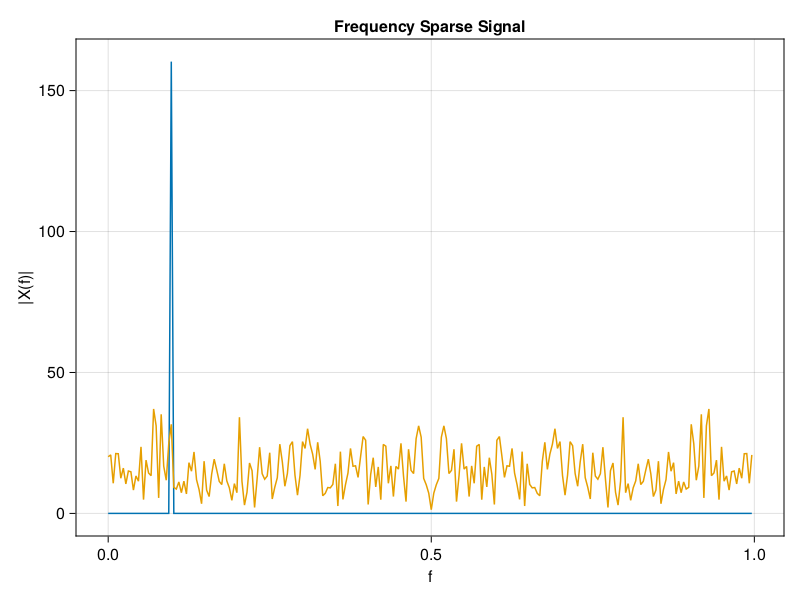

In [9]:
using JLD2

y1=JLD2.load("y1.jld2","y1")
xhat_LS = pinv(o)*y1;
L = o*dftMinv;
X1 = OMP(3, L, y1);



fig_x_spect = Figure()
ax_x_spect = Axis(fig_x_spect[1, 1],
    title = "Frequency Sparse Signal",
    xlabel = "f",
    ylabel = "|X(f)|"
)
lines!(ax_x_spect, collect(0:N-1)/N, abs.(X1))
lines!(ax_x_spect, collect(0:N-1)/N, abs.(dftM * xhat_LS))
fig_x_spect